### Preprocessing (28 pts)

In [20]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
data = pd.read_excel('GooglePlaystore.xlsx')

1.[3 pts] Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.

In [21]:
data = data[~(data['Reviews'] == '3.0M')]
data.shape

(10840, 13)

2.[4 pts] Remove rows where any of the columns has the value "Varies with device".

In [22]:
print(data.shape)
data = data.loc[~data.loc[:, :].apply(lambda x: 'Varies with device' in x.unique(), axis=1)]
# print(data)
data.shape

(10840, 13)


(9059, 13)

3.[5 pts] The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6". If there is a range (eg. 5.0 - 8.0), only consider the first number. For example, the value "5.0 - 8.0" should be changed to "5.0". The value "4.0.3 - 7.1.1" should be changed to "4.0".

In [23]:
data['Android Ver']

0        4.0.3 and up
1        4.0.3 and up
2        4.0.3 and up
4          4.4 and up
5          2.3 and up
             ...     
10834      4.1 and up
10835      4.0 and up
10836      4.1 and up
10837      4.1 and up
10838      2.2 and up
Name: Android Ver, Length: 9059, dtype: object

In [19]:
def change_version(t):
    try:
        return t[:3]
    except:
        return t
data['Android Ver'] = data['Android Ver'].apply(change_version)
data['Android Ver']

0        4.0
1        4.0
2        4.0
4        4.4
5        2.3
        ... 
10834    4.1
10835    4.0
10836    4.1
10837    4.1
10838    2.2
Name: Android Ver, Length: 9059, dtype: object

4.[5 pts] The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.

In [ ]:
def change_installs(t):
    if t.replace(',', '').strip('+').isdigit():
        return int(t.replace(',', '').strip('+'))
    
data['Installs'] = data['Installs'].apply(change_installs)

In [1]:
data['Installs']

NameError: name 'data' is not defined

5.[5 pts] For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.

In [30]:
data = data[~((data['Rating'].isna()) & (data['Reviews'] < 100) & (data['Installs'] < 50000))]
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())
data['Rating']

0        4.1
1        3.9
2        4.7
4        4.3
5        4.4
        ... 
10832    3.8
10833    4.8
10834    4.0
10836    4.5
10837    5.0
Name: Rating, Length: 7685, dtype: float64

6.[6 pts] Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.

In [32]:
def change_size(t):
    if t[-1] == 'M':
        return float(t[:-1]) * 1e6
    elif t[-1] == 'k':
        return float(t[:-1]) * 1e3

data['Size'] = data['Size'].apply(change_size)
data['Size']

TypeError: 'float' object is not subscriptable

### Visualization (27 pts)

data.groupby('Category').describe()1.[4 pts] Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.

In [33]:
data.groupby('Category').describe()

Rating                                                    \
                      count      mean       std  min    25%   50%    75%  max   
Category                                                                        
ART_AND_DESIGN         59.0  4.355465  0.366125  3.2  4.100  4.40  4.700  5.0   
AUTO_AND_VEHICLES      62.0  4.146774  0.569935  2.1  3.900  4.25  4.500  4.9   
BEAUTY                 40.0  4.282931  0.357598  3.1  4.075  4.30  4.525  4.9   
BOOKS_AND_REFERENCE   147.0  4.317124  0.453568  2.7  4.100  4.40  4.600  5.0   
BUSINESS              246.0  4.119400  0.662594  1.0  3.825  4.30  4.500  5.0   
COMICS                 49.0  4.154539  0.550369  2.8  3.800  4.40  4.600  5.0   
COMMUNICATION         210.0  4.101297  0.502648  1.0  3.900  4.20  4.400  5.0   
DATING                174.0  3.959037  0.664404  1.0  3.600  4.10  4.400  5.0   
EDUCATION             110.0  4.390658  0.255260  3.5  4.225  4.40  4.600  4.9   
ENTERTAINMENT          86.0  4.145349  0.291308  3.0  4.000  4.20  4.300  4.7   
EVENTS                 36.0  4.465901  0.343738  3.7  4.275  4.50  4.725  5.0   
FAMILY               1611.0  4.189565  0.514460  1.0  4.000  4.30  4.500  5.0   
FINANCE               263.0  4.114068  0.683553  1.0  3.900  4.30  4.500  5.0   
FOOD_AND_DRINK         86.0  4.099359  0.573641  1.7  3.800  4.20  4.500  5.0   
GAME                  956.0  4.268486  0.378433  1.0  4.100  4.30  4.500  5.0   
HEALTH_AND_FITNESS    220.0  4.215455  0.696722  1.4  4.000  4.50  4.600  5.0   
HOUSE_AND_HOME         58.0  4.162842  0.376303  2.8  4.000  4.20  4.475  4.8   
LIBRARIES_AND_DEMO     68.0  4.200508  0.350363  3.1  4.000  4.20  4.400  5.0   
LIFESTYLE             280.0  4.093732  0.714643  1.5  3.800  4.20  4.600  5.0   
MAPS_AND_NAVIGATION    94.0  4.004255  0.556663  1.9  3.700  4.20  4.400  4.9   
MEDICAL               321.0  4.180374  0.676356  1.0  3.900  4.30  4.600  5.0   
NEWS_AND_MAGAZINES    171.0  4.142206  0.586872  1.7  3.950  4.30  4.500  5.0   
PARENTING              48.0  4.333118  0.400065  3.1  4.100  4.40  4.625  5.0   
PERSONALIZATION       277.0  4.322022  0.368190  2.5  4.100  4.40  4.600  5.0   
PHOTOGRAPHY           234.0  4.145726  0.512675  2.0  4.000  4.30  4.500  5.0   
PRODUCTIVITY          232.0  4.140829  0.581528  1.0  4.000  4.20  4.500  5.0   
SHOPPING              178.0  4.226404  0.439606  1.6  4.100  4.30  4.500  5.0   
SOCIAL                170.0  4.257059  0.484289  1.9  4.100  4.30  4.600  5.0   
SPORTS                248.0  4.204727  0.466771  1.5  4.000  4.30  4.500  5.0   
TOOLS                 633.0  4.011129  0.638297  1.0  3.800  4.20  4.400  5.0   
TRAVEL_AND_LOCAL      155.0  4.029677  0.556680  2.2  3.700  4.20  4.400  5.0   
VIDEO_PLAYERS         114.0  4.030460  0.593877  1.8  3.725  4.20  4.400  4.9   
WEATHER                49.0  4.242857  0.349404  3.3  4.000  4.30  4.500  4.8   

                       Size                ...                           \
                      count          mean  ...         75%          max   
Category                                   ...                            
ART_AND_DESIGN         59.0  1.246102e+07  ...  19000000.0   39000000.0   
AUTO_AND_VEHICLES      62.0  2.163066e+07  ...  33750000.0   97000000.0   
BEAUTY                 40.0  1.477000e+07  ...  21250000.0   57000000.0   
BOOKS_AND_REFERENCE   147.0  1.420966e+07  ...  17500000.0   87000000.0   
BUSINESS              246.0  1.486782e+07  ...  20750000.0   92000000.0   
COMICS                 49.0  1.330108e+07  ...  19000000.0   40000000.0   
COMMUNICATION         210.0  1.253525e+07  ...  17000000.0   66000000.0   
DATING                174.0  1.827644e+07  ...  26750000.0   77000000.0   
EDUCATION             110.0  2.087984e+07  ...  23500000.0   97000000.0   
ENTERTAINMENT          86.0  2.226512e+07  ...  24750000.0   78000000.0   
EVENTS                 36.0  1.327872e+07  ...  21500000.0   61000000.0   
FAMILY               1611.0  3.017144e+07  ...  470000

2.[11 pts] Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:
Rating (gives top 3 most highly rated applications in each category)
Installs (gives top 3 most installed applications in each category)
Reviews (gives top 3 most reviewed applications in each category)
You don't need to do anything explicit to break ties.

Each of the returned dataframes have Category and App for the first two columns, and one of Rating (for a.), Installs (for b.), and Reviews (for c.) as the third column.

In [37]:
def free_data(type, data):
    data_free = data[data['Type'] == 'Free']
    for g in data_free.groupby('Category'):
        yield (g[1].sort_values(by=type, ascending=False)[['Category', 'App', type]].iloc[:3])

for df in free_data('Rating', data):
    print(df[['Category', 'App', 'Rating']])
    
for df in free_data('Installs', data):
    print(df[['Category', 'App', 'Installs']])
    
for df in free_data('Reviews', data):
    print(df[['Category', 'App', 'Reviews']])

            Category                                      App  Rating
8888  ART_AND_DESIGN  Spring flowers theme couleurs d t space     5.0
6930  ART_AND_DESIGN     Fantasy theme dark bw black building     4.8
3982  ART_AND_DESIGN                        Cardi B Wallpaper     4.8
             Category                                                App  \
64  AUTO_AND_VEHICLES              DMV Permit Practice Test 2018 Edition   
79  AUTO_AND_VEHICLES                            Tickets + PDA 2018 Exam   
55  AUTO_AND_VEHICLES  Tickets SDA 2018 and Exam from the State Traff...   

    Rating  
64     4.9  
79     4.9  
55     4.9  
    Category                             App  Rating
99    BEAUTY  ipsy: Makeup, Beauty, and Tips     4.9
108   BEAUTY            Prom MakeUp Tutorial     4.8
106   BEAUTY           Tie - Always be happy     4.7
                 Category                            App  Rating
8146  BOOKS_AND_REFERENCE                        CZ-Help     5.0
5763  BOOKS_AND_REFER

3.[4 pts] Find the average, maximum and minimum price of the paid applications.

In [43]:
def get_price(t):
    if isinstance(t, float) or isinstance(t, int):
        return t
    else:
        return float(t[1:])

paid_data = data[~(data['Type'] == 'Free')]
paid_data['Price'] = paid_data['Price'].apply(get_price)
print('max:{}\nmin:{}\naverage"{}\n'.format(paid_data['Price'].max(), paid_data['Price'].min(), paid_data['Price'].mean()))

max:400.0
min:0.99
average"15.139163763066062



<ipython-input-43-dcbd3341b996>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_data['Price'] = paid_data['Price'].apply(get_price)


### Visualization (16 pts)

1.[9 pts] In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’].
Count the number of applications per genre and display it using a pie chart.
Hint: Read about DataFrame.explode()

[]

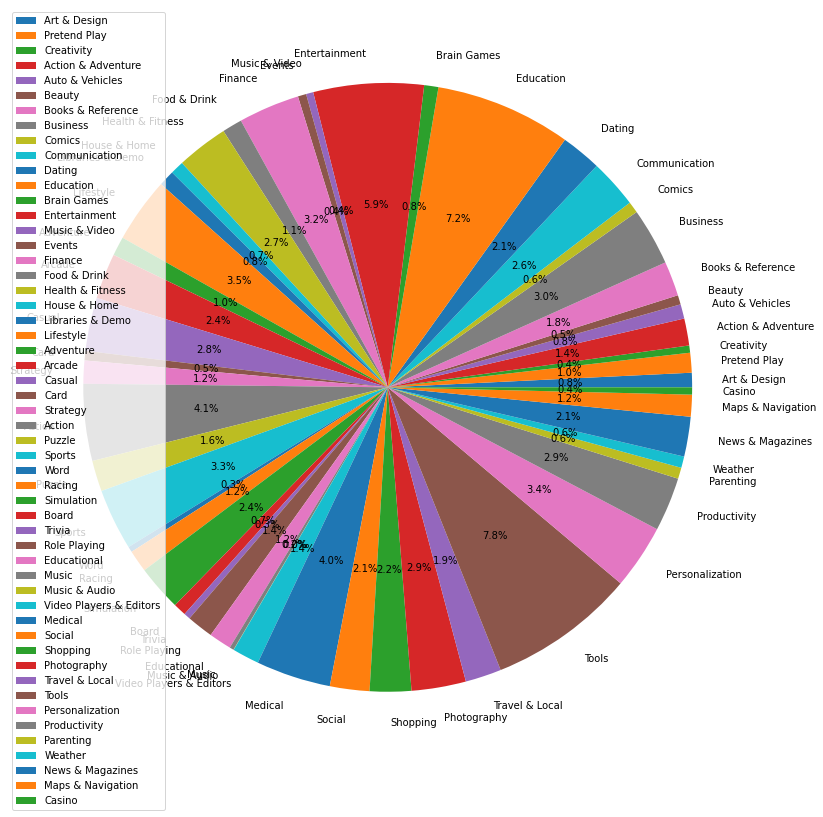

In [44]:
import matplotlib.pyplot as plt
from collections import Counter
X = []
for x in data['Genres'].str.split(';').values:
    X.extend(x)
dic_X = Counter(X)
plt.figure(figsize=(14, 14))
plt.pie(dic_X.values(), labels=dic_X.keys(), labeldistance=1.1, autopct='%.1f%%')
plt.legend()
plt.plot()

2.[7 pts] Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.

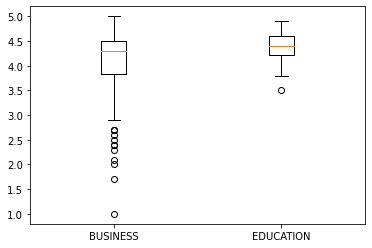

In [46]:
data_business = data[(data['Category'] == 'BUSINESS')]['Rating']
data_education = data[(data['Category'] == 'EDUCATION')]['Rating']
plt.boxplot([data_business, data_education], labels = ['BUSINESS', 'EDUCATION'])
plt.show()